## Causal Inference

In [5]:
### Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import os
# print(os.listdir("../input"))

import warnings
warnings.filterwarnings("ignore")

!pip install pycausalimpact
from causalimpact import CausalImpact

In [7]:
## Loading the dataset
df = pd.read_csv("kaggle/sales-data-set.csv")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [8]:
df.shape

(421570, 5)

In [9]:
df['Store'] = df['Store'].astype('category')
df['Dept'] = df['Dept'].astype('string')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [10]:
print("Total number of stores: ", df.Store.nunique())
print("Total number of departments: ", df.Dept.nunique())

Total number of stores:  45
Total number of departments:  81


### Data Preparation

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

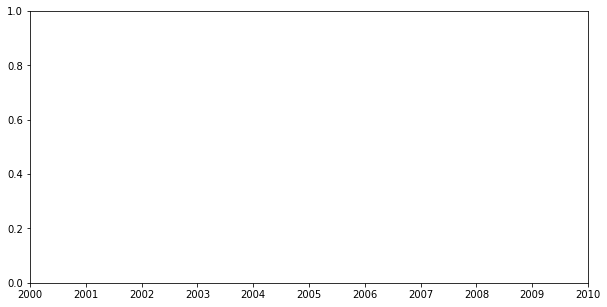

In [12]:
df_sales_new=df[(df['Store'] == 10) & (df['Dept'].isin(['1', '2', '3', '4','5' ]))].drop(columns=['IsHoliday'])
df_sales_new['Date'] = pd.to_datetime(df_sales_new['Date'])
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sales_new, x='Date', y='Weekly_Sales',hue="Dept")
plt.show()